In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from pathlib import Path
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
sns.set()

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_excel("/content/drive/MyDrive/PriceData.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    1180 non-null   object        
 1   StockCode    1180 non-null   object        
 2   Description  1179 non-null   object        
 3   Quantity     1180 non-null   int64         
 4   InvoiceDate  1180 non-null   datetime64[ns]
 5   UnitPrice    1180 non-null   float64       
 6   CustomerID   1179 non-null   float64       
 7   Country      1180 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.9+ KB


In [10]:
#convert CustomerID(Float) to (String) then remove .0 in the last of string
df['CustomerID'] = df['CustomerID'].apply(lambda x : str(x)[:-2])

In [11]:
#We Need To Deal With Those Missing Values Later
df[~df['CustomerID'].str.contains('\d+')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,n,United Kingdom


In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [13]:
df.Description.unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER',
       'KNITTED UNION FLAG HOT WATER BOTTLE',
       'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES',
       'GLASS STAR FROSTED T-LIGHT HOLDER', 'HAND WARMER UNION JACK',
       'HAND WARMER RED POLKA DOT', 'ASSORTED COLOUR BIRD ORNAMENT',
       "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN",
       'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ',
       'BOX OF 6 ASSORTED COLOUR TEASPOONS',
       'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS',
       'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD',
       'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND',
       'JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION',
       'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION',
       'BATH BUILDING BLOCK WORD', 'ALARM CLOCK BAKELIKE PINK',
       'ALARM CLOCK BAKELIKE RED ', 'ALARM CLOCK B

In [14]:
#We know that there is a NULL Values in a (Description) from df.info() , We Need to handle it first
df['Description'].fillna('Missings' , inplace = True)

In [15]:
df[df['Description'].str.contains('\w+')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
1175,536528,22570,FELTCRAFT CUSHION RABBIT,1,2010-12-01 13:17:00,3.75,15525,United Kingdom
1176,536528,22607,WOODEN ROUNDERS GARDEN SET,1,2010-12-01 13:17:00,9.95,15525,United Kingdom
1177,536528,22635,CHILDS BREAKFAST SET DOLLY GIRL,1,2010-12-01 13:17:00,9.95,15525,United Kingdom
1178,536528,22634,CHILDS BREAKFAST SET SPACEBOY,1,2010-12-01 13:17:00,9.95,15525,United Kingdom


In [16]:
# if we want to look at it :
df[~df['Description'].str.contains('\w+')].head()
# Great Job till now , now let's make this value(?) also = missing

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [17]:
df['Description'] = df['Description'].apply(lambda x : x.replace('?',"Missings"))
df[~df['Description'].str.contains('\w+')].head()
# Great, it is worked

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [18]:
# To Avoid a Problem ,Which is may be we have MILK and milk , and it is obvious we do not need to treat it
# as a 2 different products, so We Need to handle it
df['Description'] = df['Description'].apply(lambda x : x.lower())
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom


In [19]:
# Weird Output , Let's Check what is happens here
df.groupby('Description')['Quantity'].sum().sort_values()[:5]

Description
pack of 12 pink paisley tissues    -24
pack of 12 blue paisley tissues    -24
plasters in tin circus parade      -12
plasters in tin skulls             -11
plasters in tin vintage paisley     -6
Name: Quantity, dtype: int64

In [20]:
# Let us remove every row has a UnitPrice = 0
df[df['Description']=='missings'].sort_values(by = 'Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,missings,56,2010-12-01 11:52:00,0.0,n,United Kingdom


In [21]:
# simply i got every row has price = 0 ,then i threw it away and took the rest
df = df[~(df['UnitPrice']==0)].sort_values(by = 'UnitPrice')

In [22]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
219,536390,20668,disco ball christmas decoration,288,2010-12-01 10:19:00,0.10,17511,United Kingdom
513,536409,20668,disco ball christmas decoration,24,2010-12-01 11:45:00,0.12,17908,United Kingdom
473,536408,16237,sleeping cat erasers,30,2010-12-01 11:41:00,0.21,14307,United Kingdom
512,536409,16238,party time pencil erasers,28,2010-12-01 11:45:00,0.21,17908,United Kingdom
730,536437,17021,namaste swagat incense,600,2010-12-01 12:12:00,0.24,13694,United Kingdom
...,...,...,...,...,...,...,...,...
168,536385,22783,set 3 wicker oval baskets w lids,1,2010-12-01 09:56:00,19.95,17420,United Kingdom
141,C536379,D,discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
294,536396,22803,ivory embroidered quilt,2,2010-12-01 10:51:00,35.75,17850,United Kingdom
431,536406,22803,ivory embroidered quilt,2,2010-12-01 11:33:00,35.75,17850,United Kingdom


In [23]:
# i don't know what is mean by product = negative values
# i will remove it because i think it is just a noisy data
df = df.iloc[2:]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
473,536408,16237,sleeping cat erasers,30,2010-12-01 11:41:00,0.21,14307,United Kingdom
512,536409,16238,party time pencil erasers,28,2010-12-01 11:45:00,0.21,17908,United Kingdom
730,536437,17021,namaste swagat incense,600,2010-12-01 12:12:00,0.24,13694,United Kingdom
1138,536528,22616,pack of 12 london tissues,1,2010-12-01 13:17:00,0.29,15525,United Kingdom
797,536464,21980,pack of 12 red retrospot tissues,1,2010-12-01 12:23:00,0.29,17968,United Kingdom


In [24]:
# if u look to the last row , we have a Quantity = -720 , let's figure out what it is
df[df['Description']=='discount'].sort_values(by = 'Quantity')
# okay , we could consider it as a quantity in stock has an offer(Discount)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,discount,-1,2010-12-01 09:41:00,27.5,14527,United Kingdom


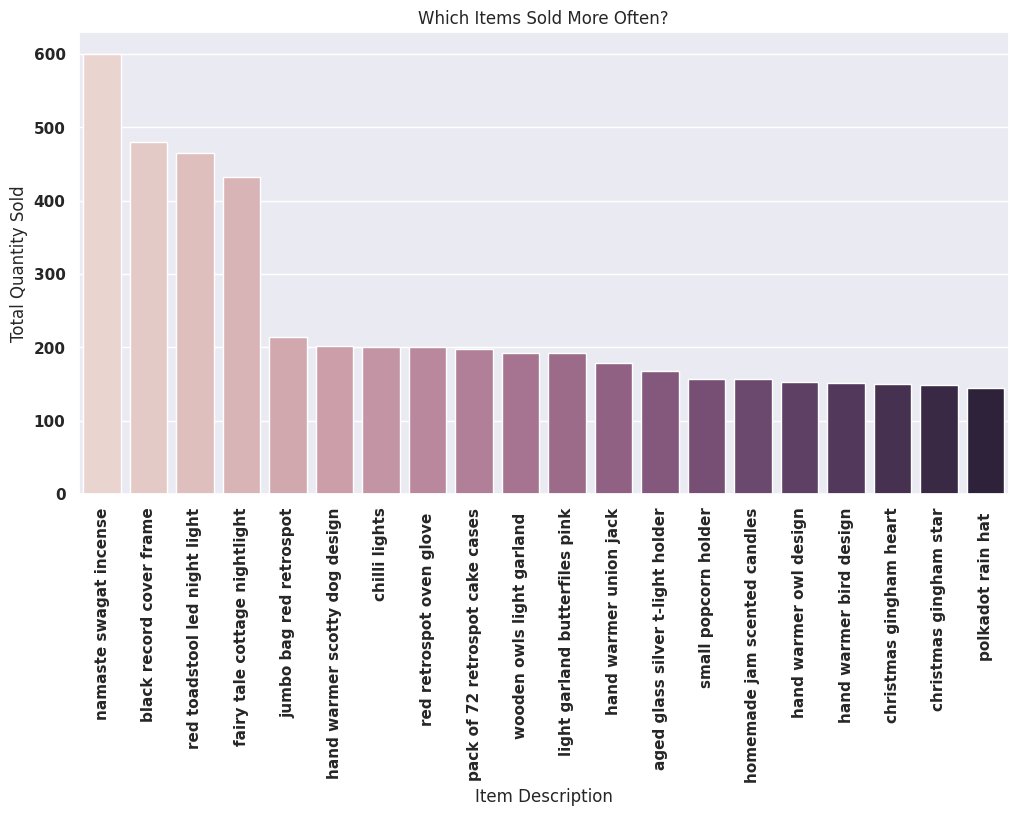

In [26]:
# Now , return back to our first question
# Calculate the sum of quantities for each item description and get the top 20
items = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)[:20]

plt.figure(figsize=(12, 6))
sns.barplot(x=items.index, y=items.values, palette=sns.cubehelix_palette(20))
plt.title("Which Items Sold More Often?")
plt.xticks(rotation=90)
plt.xlabel('Item Description', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.show()

In [27]:
# We Need To make Extra Column called (Sales)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
473,536408,16237,sleeping cat erasers,30,2010-12-01 11:41:00,0.21,14307,United Kingdom
512,536409,16238,party time pencil erasers,28,2010-12-01 11:45:00,0.21,17908,United Kingdom
730,536437,17021,namaste swagat incense,600,2010-12-01 12:12:00,0.24,13694,United Kingdom
1138,536528,22616,pack of 12 london tissues,1,2010-12-01 13:17:00,0.29,15525,United Kingdom
797,536464,21980,pack of 12 red retrospot tissues,1,2010-12-01 12:23:00,0.29,17968,United Kingdom


In [28]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
473,536408,16237,sleeping cat erasers,30,2010-12-01 11:41:00,0.21,14307,United Kingdom,6.30
512,536409,16238,party time pencil erasers,28,2010-12-01 11:45:00,0.21,17908,United Kingdom,5.88
730,536437,17021,namaste swagat incense,600,2010-12-01 12:12:00,0.24,13694,United Kingdom,144.00
1138,536528,22616,pack of 12 london tissues,1,2010-12-01 13:17:00,0.29,15525,United Kingdom,0.29
797,536464,21980,pack of 12 red retrospot tissues,1,2010-12-01 12:23:00,0.29,17968,United Kingdom,0.29
...,...,...,...,...,...,...,...,...,...
168,536385,22783,set 3 wicker oval baskets w lids,1,2010-12-01 09:56:00,19.95,17420,United Kingdom,19.95
141,C536379,D,discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
294,536396,22803,ivory embroidered quilt,2,2010-12-01 10:51:00,35.75,17850,United Kingdom,71.50
431,536406,22803,ivory embroidered quilt,2,2010-12-01 11:33:00,35.75,17850,United Kingdom,71.50


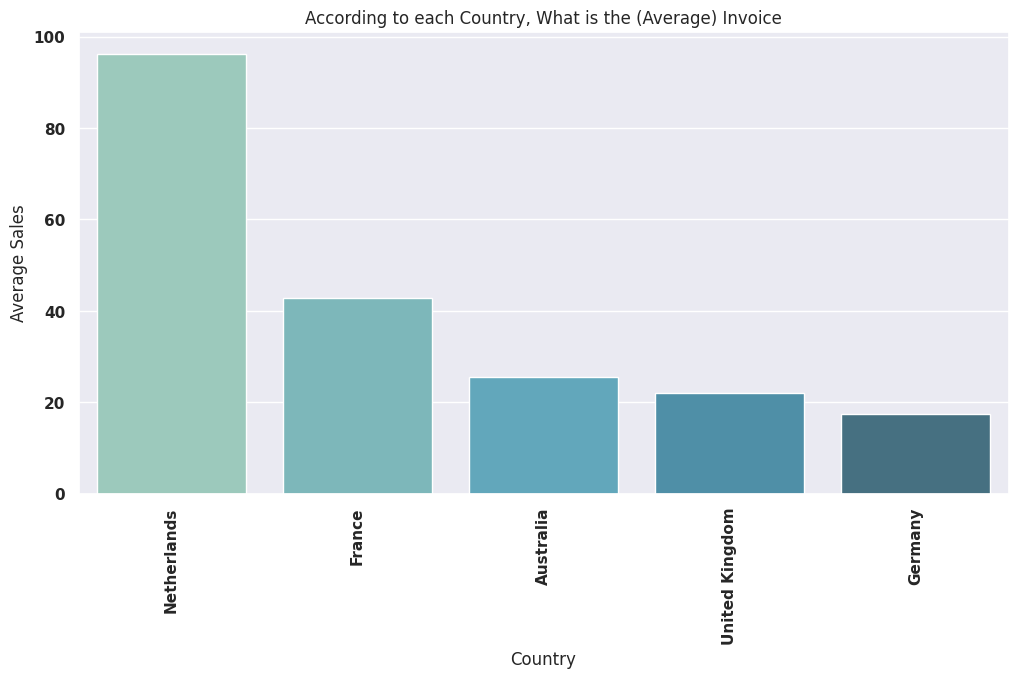

In [30]:
# we could include the negative sales with us , but it will not express the population , because it is just a fees
# or any damaged products or any discounts , here we are just assuming
countries = df[df['Sales'] > 0].groupby('Country')['Sales'].mean().sort_values(ascending=False)[:20]

plt.figure(figsize=(12, 6))
sns.barplot(x=countries.index, y=countries.values, palette=sns.color_palette("GnBu_d"))
plt.title("According to each Country, What is the (Average) Invoice")
plt.xticks(rotation=90)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.show()

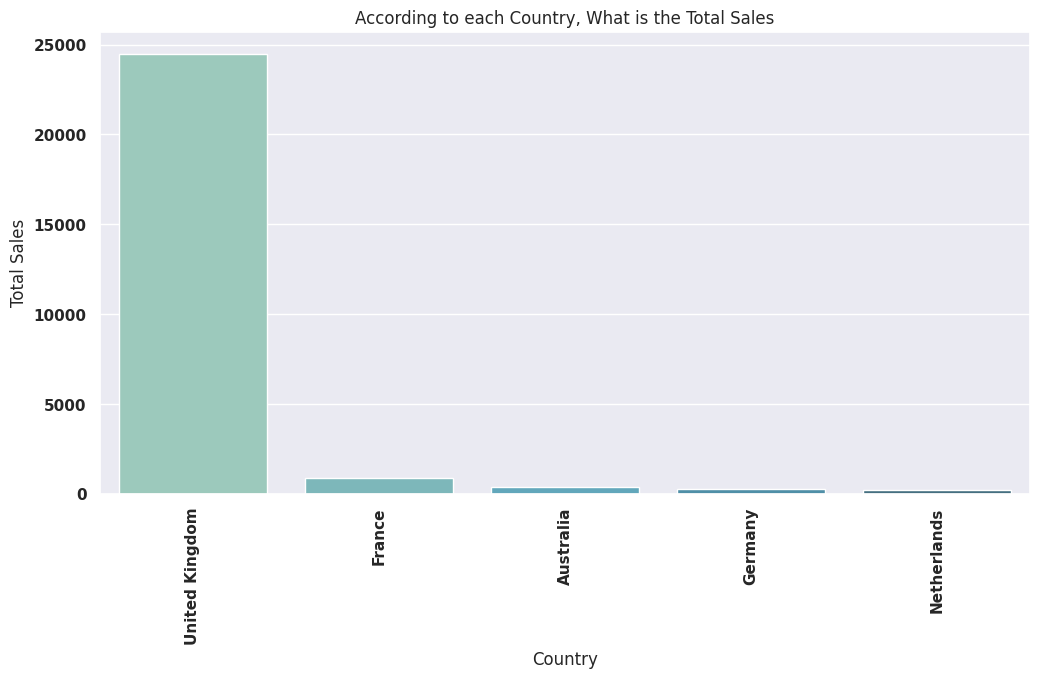

In [32]:
# We could also look at total sales in each country
countries = df[df['Sales'] > 0].groupby('Country')['Sales'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=countries.index, y=countries.values, palette=sns.color_palette("GnBu_d"))
plt.title("According to each Country, What is the Total Sales")
plt.xticks(rotation=90)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

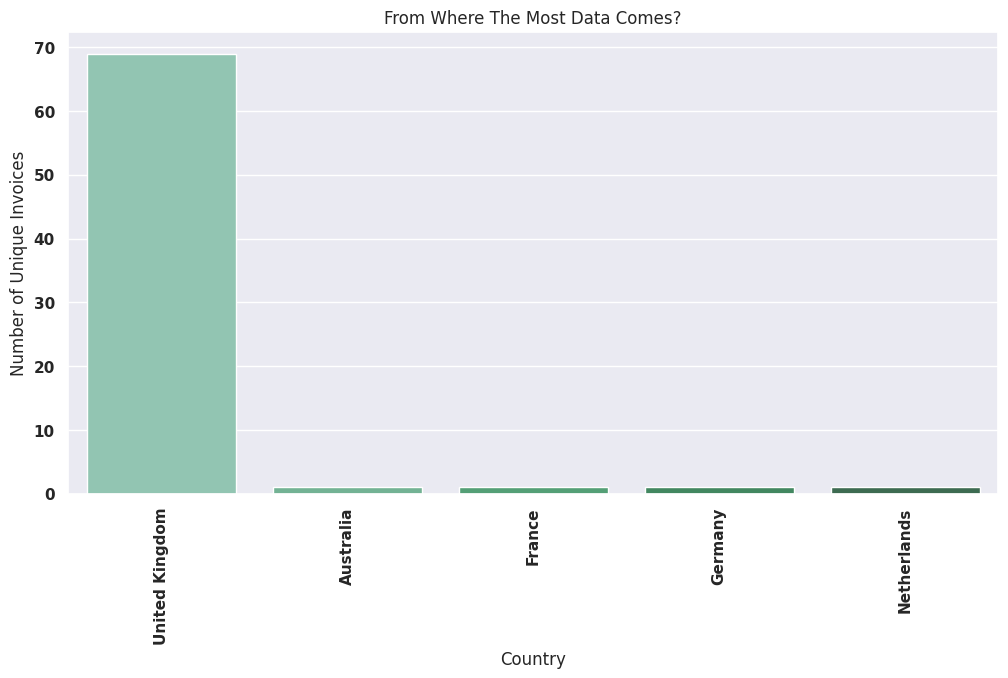

In [34]:
data_flow = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=data_flow.index, y=data_flow.values, palette=sns.color_palette("BuGn_d"))
plt.title("From Where The Most Data Comes?")
plt.xticks(rotation=90)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Unique Invoices', fontsize=12)
plt.show()

In [35]:
# Seems Like United Kingdom is an Outiler , Like we Knew that the Most of (Anything) comes from it
# if u need to look to the raw data , here it is the first 10 rows
data_flow

Country
United Kingdom    69
Australia          1
France             1
Germany            1
Netherlands        1
Name: InvoiceNo, dtype: int64

In [36]:
df.groupby('StockCode')['InvoiceNo'].nunique().sort_values(ascending = False)[:10]

StockCode
22632     12
85123A    10
22633     10
22961     10
84029E     9
22960      8
22866      7
84879      7
22837      6
22910      6
Name: InvoiceNo, dtype: int64

In [37]:
# if we looked at just value_counts it will lead us to a wrong conclusion
df['StockCode'].value_counts()[:10]
# if u look carefully to both output u will notice that is a different output

22632     13
22866     11
85123A    10
22633     10
22961     10
84029E     9
22960      8
22865      8
22900      8
84879      7
Name: StockCode, dtype: int64

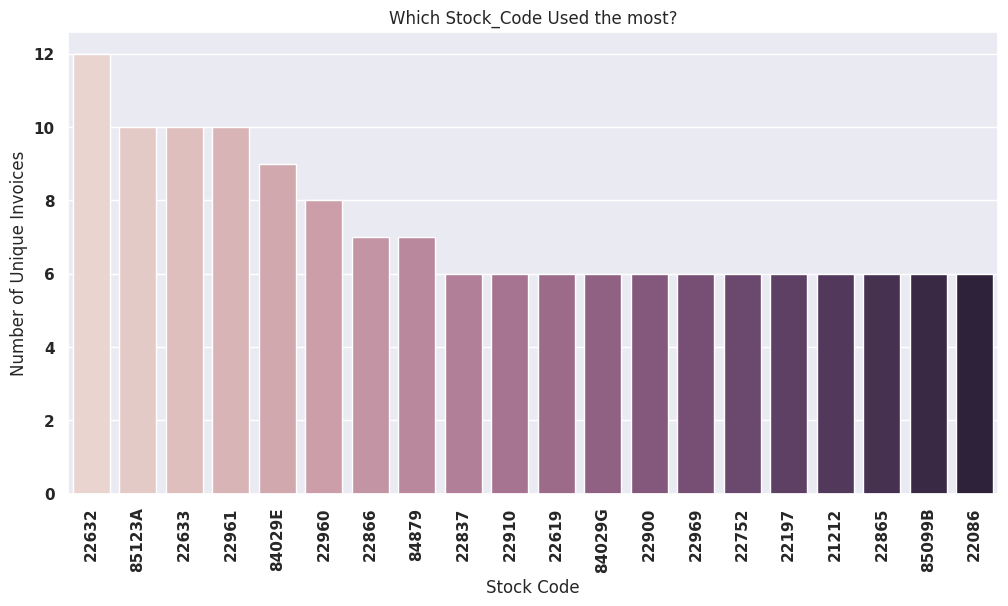

In [39]:
# if u wany to visualize it
stock_codes = df.groupby('StockCode')['InvoiceNo'].nunique().sort_values(ascending=False)[:20]

plt.figure(figsize=(12, 6))
sns.barplot(x=stock_codes.index, y=stock_codes.values, palette=sns.cubehelix_palette(20))
plt.title("Which Stock_Code Used the most?")
plt.xticks(rotation=90)
plt.xlabel('Stock Code', fontsize=12)
plt.ylabel('Number of Unique Invoices', fontsize=12)
plt.show()


In [40]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
473,536408,16237,sleeping cat erasers,30,2010-12-01 11:41:00,0.21,14307,United Kingdom,6.30
512,536409,16238,party time pencil erasers,28,2010-12-01 11:45:00,0.21,17908,United Kingdom,5.88
730,536437,17021,namaste swagat incense,600,2010-12-01 12:12:00,0.24,13694,United Kingdom,144.00
1138,536528,22616,pack of 12 london tissues,1,2010-12-01 13:17:00,0.29,15525,United Kingdom,0.29
797,536464,21980,pack of 12 red retrospot tissues,1,2010-12-01 12:23:00,0.29,17968,United Kingdom,0.29


In [41]:
df['Year'] = df['InvoiceDate'].apply(lambda x : x.year)
df['Month'] = df['InvoiceDate'].apply(lambda x : x.month)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Year,Month
473,536408,16237,sleeping cat erasers,30,2010-12-01 11:41:00,0.21,14307,United Kingdom,6.30,2010,12
512,536409,16238,party time pencil erasers,28,2010-12-01 11:45:00,0.21,17908,United Kingdom,5.88,2010,12
730,536437,17021,namaste swagat incense,600,2010-12-01 12:12:00,0.24,13694,United Kingdom,144.00,2010,12
1138,536528,22616,pack of 12 london tissues,1,2010-12-01 13:17:00,0.29,15525,United Kingdom,0.29,2010,12
797,536464,21980,pack of 12 red retrospot tissues,1,2010-12-01 12:23:00,0.29,17968,United Kingdom,0.29,2010,12


In [42]:
sales_per_year = df.groupby('Year')['Sales'].sum().sort_values(ascending = False)
sales_per_year


Year
2010    25972.84
Name: Sales, dtype: float64

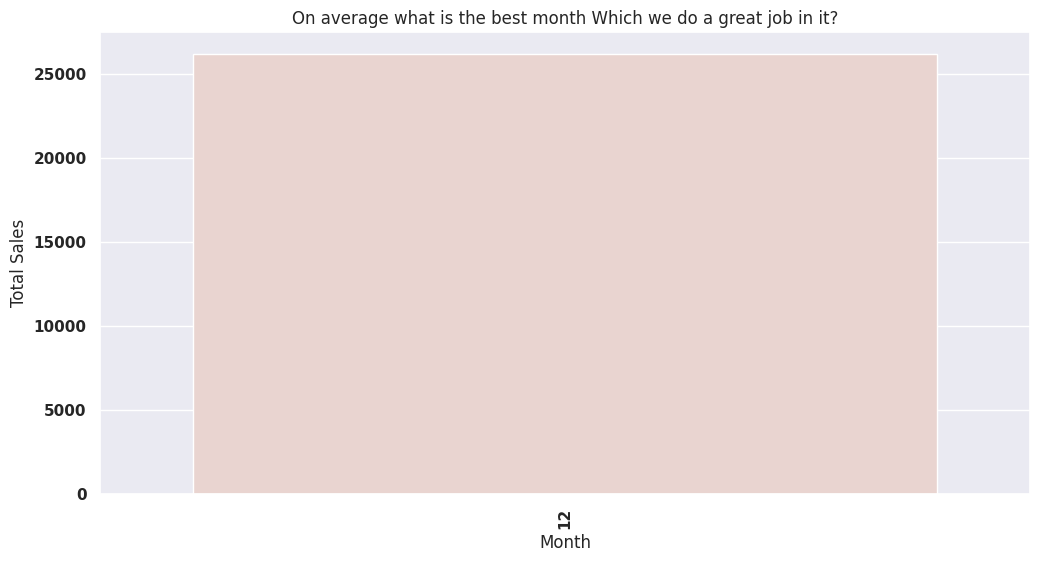

In [44]:
sales_per_month = df[df['Sales'] > 0].groupby('Month')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sales_per_month.index, y=sales_per_month.values, palette=sns.cubehelix_palette(12))
plt.title("On average what is the best month Which we do a great job in it?")
plt.xticks(rotation=90)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

In [45]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt

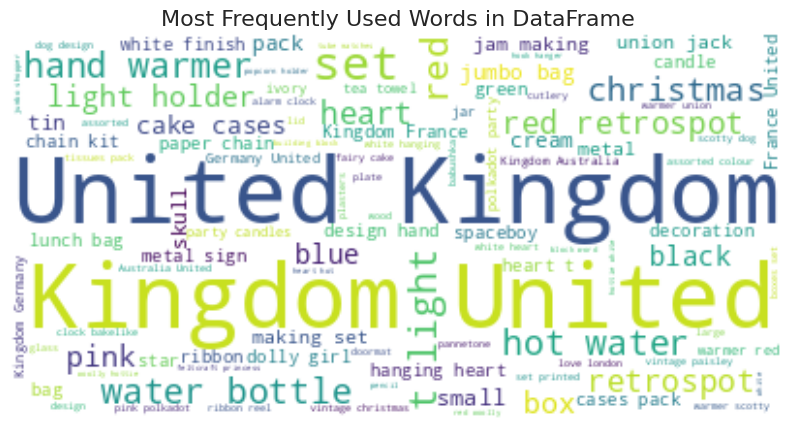

In [50]:
# Concatenate text from all the columns into a single string
text = " ".join(str(val) for col in df for val in df[col])

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequently Used Words in DataFrame", fontsize=16)
plt.show()